In [5]:
#Load the necessary modules and csv file into a dataframe
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 100)

df = pd.read_csv('municipality_bus_utilization.csv', infer_datetime_format=True,
                parse_dates=True, sep=",")
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [7]:
#Checking dataframe length and columns containing NaN's
print(len(df))
for col in df.columns:
    print(col)
    print(df[col].isna().values.any())

13070
timestamp
False
municipality_id
False
usage
False
total_capacity
False


In [8]:
#Check the dtypes of values
df.dtypes

timestamp          object
municipality_id     int64
usage               int64
total_capacity      int64
dtype: object

In [9]:
# Convert the timestamp to datetime:
df['timestamp'] = pd.to_datetime(df['timestamp'])
#Checking the type again
df.dtypes

timestamp          datetime64[ns]
municipality_id             int64
usage                       int64
total_capacity              int64
dtype: object

In [10]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [11]:
#There are no NaN values in this dataframe.
# We start by grouping the values for each municipality taking the maximum of two measurements.

df_group = df.groupby([pd.Grouper(key='timestamp', freq='1H'), pd.Grouper('municipality_id')]).max()
print(len(df_group))

6740


In [12]:
df_group.head()

usage  total_capacity
timestamp           municipality_id                       
2017-06-04 07:00:00 0                  204            2813
                    1                  129             397
                    2                  273             697
                    3                  623            1930
                    4                 1090            3893

In [13]:
# Checking whether the grouped data contains any NaN's.
for col in df_group.columns:
    print(col)
    print(df_group[col].isna().values.any())

usage
False
total_capacity
False


In [14]:
# It seems that that is not the case.
df_group.describe()

,usage,total_capacity
count,6740.000000,6740.000000
mean,893.321662,1972.800000
std,687.228407,1144.115892
min,12.000000,397.000000
25%,408.750000,697.000000
50%,709.000000,1974.500000
75%,1206.250000,2947.000000
max,3508.000000,3893.000000


In [15]:
# Casting df_group columns back to integers:
df_group[['usage', 'total_capacity']] = df_group[['usage', 'total_capacity']].astype(int)
print(df_group.dtypes)
df_group

usage             int64
total_capacity    int64
dtype: object


usage  total_capacity
timestamp           municipality_id                       
2017-06-04 07:00:00 0                  204            2813
                    1                  129             397
                    2                  273             697
                    3                  623            1930
                    4                 1090            3893
...                                    ...             ...
2017-08-19 16:00:00 5                  239             587
                    6                 1727            3113
                    7                 1450            2019
                    8                 1253            2947
                    9                  879            1332

[6740 rows x 2 columns]

In [16]:
#Now, we need to separate the data for each municipality for training and testing, also for visualization purposes:
y_train = df_group.query('timestamp < datetime.datetime(2017, 8, 5)')['usage'].unstack(level=1)
y_test = df_group.query('timestamp >= datetime.datetime(2017, 8, 5)')['usage'].unstack(level=1)

In [17]:
# We separate the municipality columns for training and testing sets for both the features and target:

municipality_dict_y_train = {}
for col in y_train.columns:
    print(type(y_train[col][col]))
    municipality_dict_y_train[str(col)] = y_train[col]

municipality_dict_y_test = {}
for col in y_test.columns:
    municipality_dict_y_test[str(col)] = y_test[col]
    
municipality_full_data_dict = {}
for col in y_train.columns:
    municipality_full_data_dict[str(col)] = pd.concat([y_train[col], y_test[col]], axis=0)
    
print(municipality_dict_y_train['6'])

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
timestamp
2017-06-04 07:00:00     597
2017-06-04 08:00:00     801
2017-06-04 09:00:00    1061
2017-06-04 10:00:00    1219
2017-06-04 11:00:00    1297
                       ... 
2017-08-02 12:00:00    1167
2017-08-02 13:00:00    1182
2017-08-02 14:00:00    1144
2017-08-02 15:00:00    1059
2017-08-02 16:00:00    1018
Name: 6, Length: 532, dtype: int64


In [18]:
for ix in map(str,range(10)):
    print(municipality_dict_y_train[ix])

timestamp
2017-06-04 07:00:00    204
2017-06-04 08:00:00    332
2017-06-04 09:00:00    485
2017-06-04 10:00:00    583
2017-06-04 11:00:00    614
                      ... 
2017-08-02 12:00:00    661
2017-08-02 13:00:00    667
2017-08-02 14:00:00    656
2017-08-02 15:00:00    635
2017-08-02 16:00:00    638
Name: 0, Length: 532, dtype: int64
timestamp
2017-06-04 07:00:00    129
2017-06-04 08:00:00    164
2017-06-04 09:00:00    245
2017-06-04 10:00:00    317
2017-06-04 11:00:00    341
                      ... 
2017-08-02 12:00:00    411
2017-08-02 13:00:00    411
2017-08-02 14:00:00    406
2017-08-02 15:00:00    391
2017-08-02 16:00:00    358
Name: 1, Length: 532, dtype: int64
timestamp
2017-06-04 07:00:00    273
2017-06-04 08:00:00    355
2017-06-04 09:00:00    494
2017-06-04 10:00:00    582
2017-06-04 11:00:00    643
                      ... 
2017-08-02 12:00:00    683
2017-08-02 13:00:00    694
2017-08-02 14:00:00    653
2017-08-02 15:00:00    593
2017-08-02 16:00:00    553
Name: 2, 

P-value:  0.3525418169404132
P-value:  0.02253402248262915
P-value:  5.950476489160281e-07
P-value:  2.019560437059359e-10
P-value:  1.3594518583339802e-08
P-value:  1.9593063065974168e-08
P-value:  0.003251002656888453
P-value:  2.2826200275864958e-05
P-value:  2.2671146897436477e-12
P-value:  1.662345820021245e-05


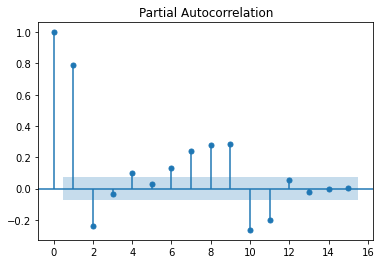

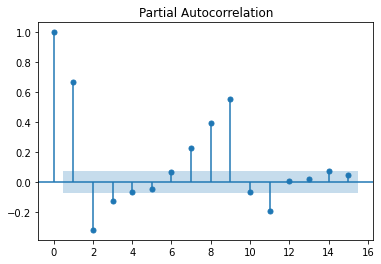

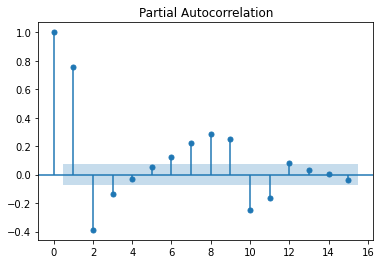

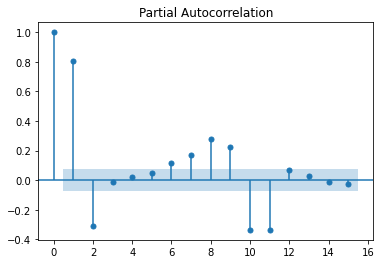

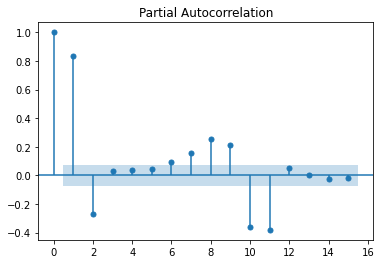

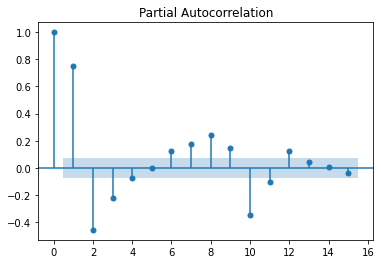

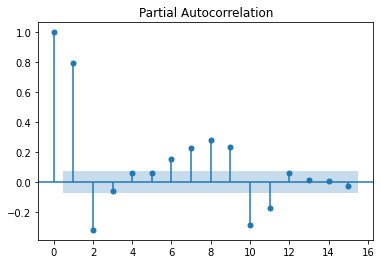

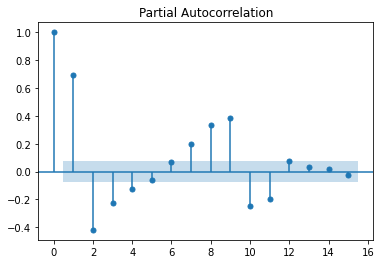

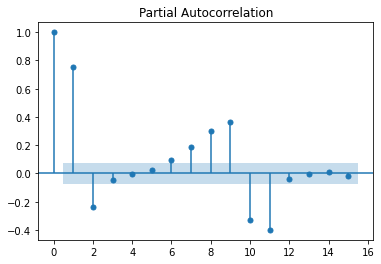

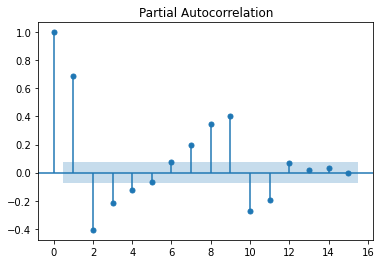

In [19]:
# Base Case: Auto Regressive Models (AR)

# We first try to see whether there is autocorrelation in the time-series data for each municiapility

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

for ix in map(str,range(10)):
    df_stationarityTest = adfuller(municipality_full_data_dict[ix], autolag='AIC')
    print("P-value: ", df_stationarityTest[1])
    pacf = plot_pacf(municipality_full_data_dict[ix], lags=15)

In [20]:
# From the observation of the data above we can see that there is partial autocorrelation in the data for each
# municipality. We also see that we can train the AR model to the order of 12 from the graphs above.

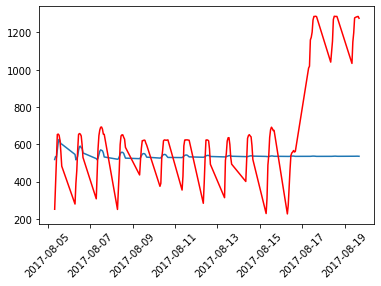

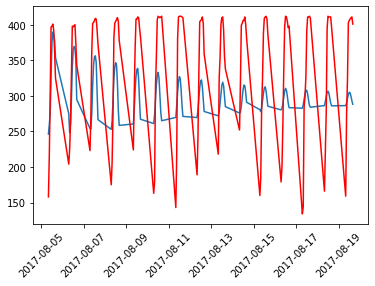

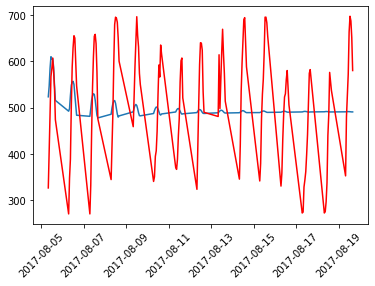

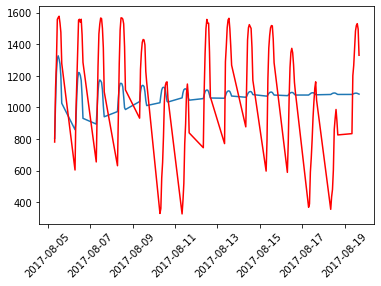

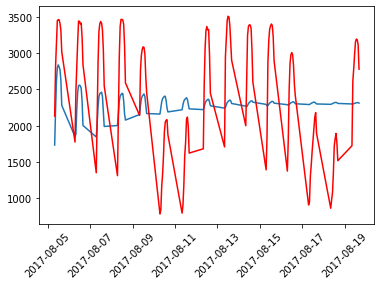

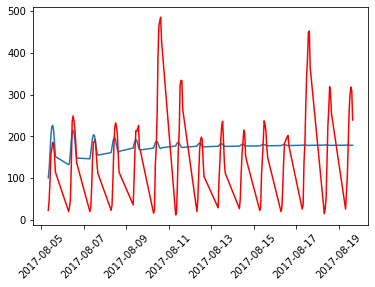

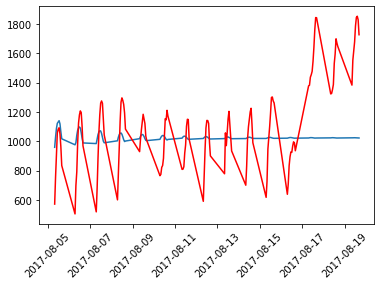

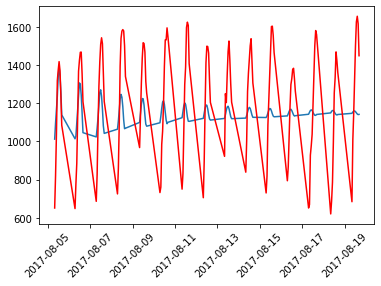

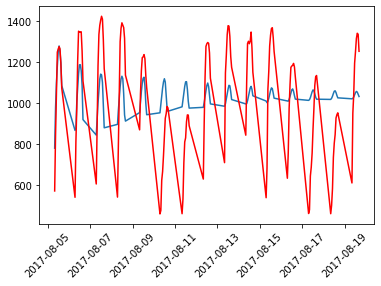

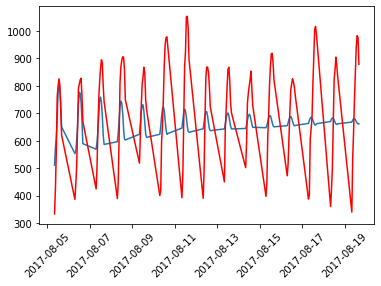

{'0': 320.7842280294028, '1': 84.57770751786737, '2': 120.36604411864354, '3': 336.4391684677655, '4': 784.8325348277054, '5': 105.49067386018237, '6': 312.5108643218132, '7': 283.4284696662207, '8': 248.0509789031617, '9': 177.40408017660698}


In [21]:
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot as plt
from statsmodels.tools.eval_measures import rmse

preds = {}
scores = {}
for ix in map(str,range(10)):
    ar_model = AutoReg(municipality_dict_y_train[ix].values.tolist(), lags=12).fit()
#     print(ar_model.summary())
    preds[ix] = ar_model.predict(start=len(municipality_dict_y_train[ix]), 
                                 end=len(municipality_full_data_dict[ix])-1, 
                                 dynamic=False)
    plt.figure()
    plt.plot(pd.Series(preds[ix], index=municipality_dict_y_test[ix].index))
    plt.plot(municipality_dict_y_test[ix], color='red')
    plt.xticks(rotation=45)
    plt.show()
    scores[ix] = rmse(preds[ix], municipality_dict_y_test[ix].values.tolist())

print(scores)
    


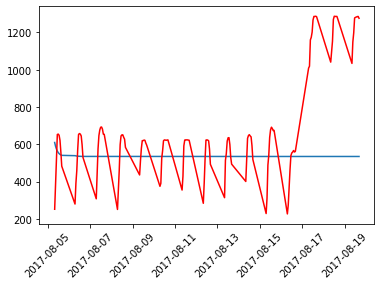

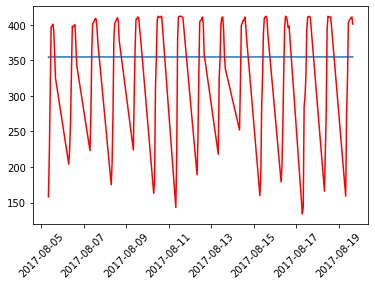

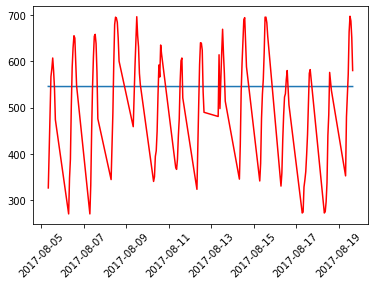

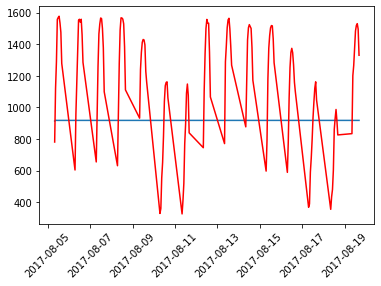

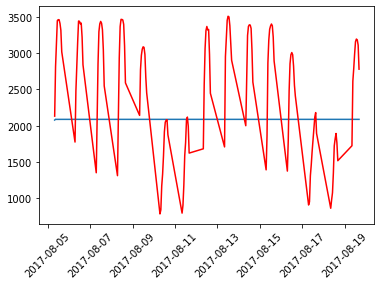

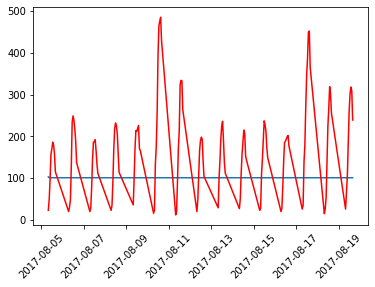

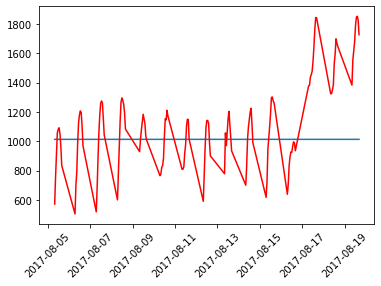

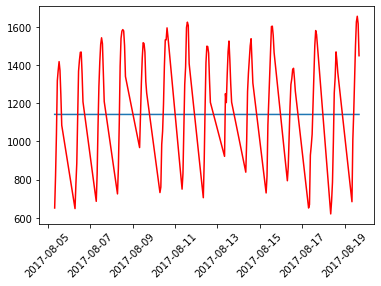

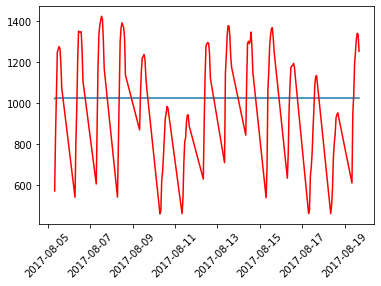

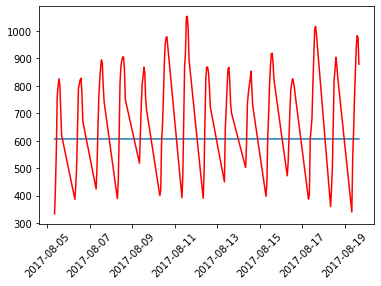

{'0': 324.0956951873473, '1': 82.82599964379816, '2': 121.71598559067559, '3': 426.84013180625834, '4': 918.8434336782805, '5': 128.37796213743854, '6': 318.43403247318804, '7': 301.8003791221882, '8': 275.69363710867833, '9': 217.65890036487315}


In [22]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

preds = {}
for ix in map(str,range(10)):
    arima_model = ARIMA(municipality_dict_y_train[ix].values.tolist(), order=(1,1,1)).fit()
#     print(ar_model.summary())
    preds[ix] = arima_model.predict(start=len(municipality_dict_y_train[ix]), 
                                 end=len(municipality_full_data_dict[ix])-1, 
                                 dynamic=False)
    plt.figure()
    plt.plot(pd.Series(preds[ix], index=municipality_dict_y_test[ix].index))
    plt.plot(municipality_dict_y_test[ix], color='red')
    plt.xticks(rotation=45)
    plt.show()
    scores[ix] = rmse(preds[ix], municipality_dict_y_test[ix].values.tolist())
print(scores)
    

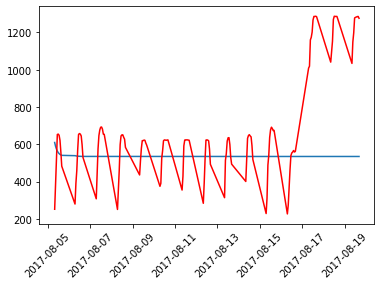

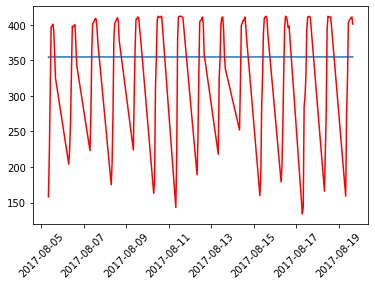

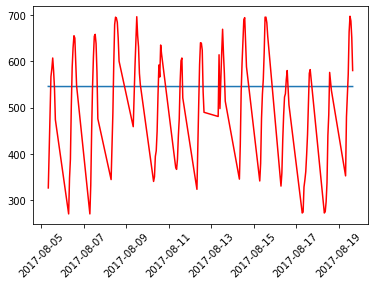

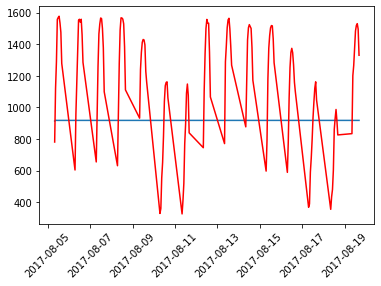

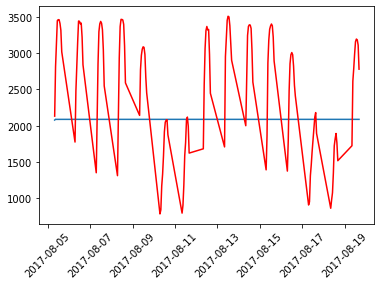

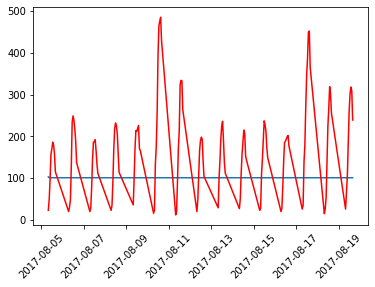

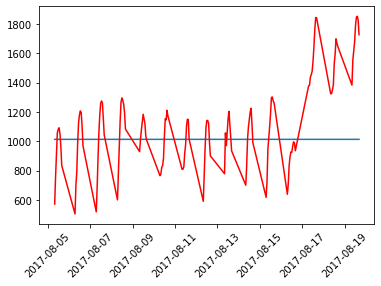

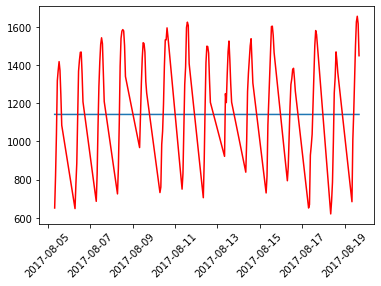

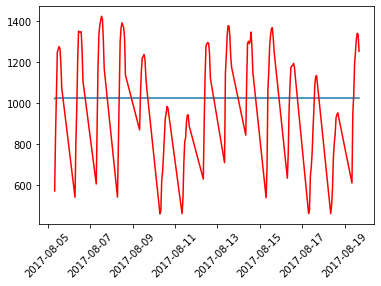

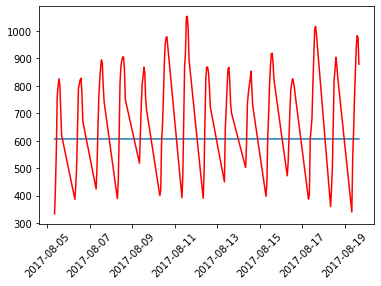

{'0': 324.0956951873473, '1': 82.82599964379816, '2': 121.71598559067559, '3': 426.84013180625834, '4': 918.8434336782805, '5': 128.37796213743854, '6': 318.43403247318804, '7': 301.8003791221882, '8': 275.69363710867833, '9': 217.65890036487315}


In [23]:
# SARIMAX Model
# ARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

preds = {}
for ix in map(str,range(10)):
    sarimax_model = SARIMAX(municipality_dict_y_train[ix].values.tolist(), 
                       order=(1,1,1),
                       seasonal_order=(0,0,0,0)).fit()
#     print(ar_model.summary())
    preds[ix] = sarimax_model.predict(start=len(municipality_dict_y_train[ix]), 
                                 end=len(municipality_full_data_dict[ix])-1, 
                                 dynamic=False)
    plt.figure()
    plt.plot(pd.Series(preds[ix], index=municipality_dict_y_test[ix].index))
    plt.plot(municipality_dict_y_test[ix], color='red')
    plt.xticks(rotation=45)
    plt.show()
    scores[ix] = rmse(preds[ix], municipality_dict_y_test[ix].values.tolist())
print(scores)
    


In [24]:
# We conclude that for this example on average complex models do not perform better than simple models. In fact,
# the AR model which is the simplest one provides the lower rmse (root mean squared error) among the candidate
# solutions.